In [47]:
import pandas as pd


In [2]:
df_news=pd.read_csv("Combined_News_DJIA.csv")
df_news['Date']=pd.to_datetime(df_news['Date'])

In [3]:
df_price=pd.read_csv("new_djprice.csv")
df_price.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score
0,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0,NaN,NaN
1,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0,0.013555,NaN
2,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0,-0.020798,NaN
3,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0,0.007318,NaN
4,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0,-0.011442,NaN


In [4]:
df_price['Date']=pd.to_datetime(df_price['Date'])
df_price

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score
0,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0,NaN,NaN
1,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0,0.013555,NaN
2,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0,-0.020798,NaN
3,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0,0.007318,NaN
4,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0,-0.011442,NaN
...,...,...,...,...,...,...,...,...,...
3770,2023-06-28,33881.38,33903.76,33755.92,33852.66,33852.66,268050000.0,-0.002184,0.583472
3771,2023-06-29,33854.57,34147.68,33828.63,34122.42,34122.42,279940000.0,0.007969,1.244567
3772,2023-06-30,34269.92,34467.35,34269.92,34407.60,34407.60,351060000.0,0.008358,1.887133
3773,2023-07-03,34369.78,34465.60,34286.54,34418.47,34418.47,157590000.0,0.000316,1.840525


In [9]:
df_master=df_price.merge(df_news, how='left', on='Date')

In [10]:
df_master
df_master=df_master.dropna()
df_master
len(df_master)/252

7.773809523809524

In [21]:
# lets add any significant and then lets check the sentiment

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,"b"" Thaksin's brother-in-law is elected as Thai...",b'1st anniversary of the beginning of the Saff...,b'Russian stock market falls 17%',b'Car bombs at U.S. embassy in Yemen kill 16',"b""CIA: Bin Laden doesn't oversee day-to-day al...",b'WTF? Six Brazilian politicians legally chang...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ..."
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,"b'Iraqis kills 3 contractors, city Fallujah is...",b'CIA Chief Speaks of Trying to Provoke Terror...,"b'German Authorities Wiretap Skype, Raid Homes...","b'In Yemen, a Planned Massacre of Americans Is...",b'Livni sweeps Kadima race; Olmert pledges coo...,b'Rising prices tip another 75 million towards...,"b""Sri Lanka's navy says it has fought a sea ba...",b'official poverty rates of 51.8% in Gaza and ...,b'India deploys planes with Nuclear Capability...,b'Tariq Ali: Has the U.S. Invasion of Pakistan...
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,b'America continues to lose world influence as...,b'Rice says U.S. will resist Russian moves aga...,b'14 men rob a coca cola factory - shoot out w...,"b'South Ossetia information warfare, two sides...",b'North Korea preparing to restart nuclear rea...,b' Venezuela expels U.S. rights group for crit...,b'Chavez expells Human Rights Watch from Venez...,b'Euthanasia advocate takes her own life.',"b""The complete list of the world's billionaires""","b""Swaziland's HIV/AIDS treatment crisis goes c..."
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,"b""All We are Saying is GIve Peace a Chance - U...",b'Dig pinpoints Stonehenge origins',"b'Almost 13,000 Chinese children sickened by t...","b""Pakistan's rulers were supposed to be in Hot...","b'Turkey scared to admit Armenian genocide, sa...","b""Change in dinner plans saved Pakistan's rule...",b'Pakistani troops fire on intruding U.S. chop...,b'Heads are starting to role in China as the t...,b'Russian ambassador: Czechs selling security ...,"b""Merchant of Death appears in Thai court, no ..."
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,b'Sarkozy calls for those behind the market cr...,"b""Russia engages in 'gangland' diplomacy as it...","b""EU patent office on strike: 'the organisatio...",b'Mystery surrounds hijacked Iranian ship',b' U.S.-led wars behind Wall Street crisis: Ah...,b'Pakistan blames US raids for hotel bombing',b'Double Darwin Award? A couple having sex on ...,b'Tourists Taken Hostage in Egypt - Relocated ...,"b'Bush, Ahmadinejad To Speak At UN '",b'Workers Allegedly Beat CEO To Death In India'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2016-06-27,17355.21,17355.21,17063.08,17140.24,17140.24,138740000.0,-0.014971,-3.342046,0.0,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
2009,2016-06-28,17190.51,17409.72,17190.51,17409.72,17409.72,112190000.0,0.015722,-1.833787,1.0,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,

In [11]:
import openai

In [12]:
f = open("secret_key.env.txt", "r")
secret_key=f.read()
openai.api_key=secret_key

In [10]:
def openai_prompt(prompt):
    completion = openai.Completion.create(model="text-davinci-003", prompt=prompt)
    response=completion.choices[0].text
    return response

In [13]:
def extract_headline(row_data):
    """
    row_data=df_sig_news.iloc[row_index, :]
    """
    master_string=[str(i+1)+" : "+str(row_data[10:][i]) for i in range(0, len(row_data[10:]))]
    master_string="\n".join(master_string)
    return master_string

In [14]:
important_issues=['oil', 'bank','military', 'russia', 'middle-east war', 'war', 'china economy', 'market price', 'nuclear war']

In [31]:
df_master['significance']=0
df_master.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,significance,sentiment
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,b'Russian stock market falls 17%',b'Car bombs at U.S. embassy in Yemen kill 16',"b""CIA: Bin Laden doesn't oversee day-to-day al...",b'WTF? Six Brazilian politicians legally chang...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ...",0,0
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,"b'German Authorities Wiretap Skype, Raid Homes...","b'In Yemen, a Planned Massacre of Americans Is...",b'Livni sweeps Kadima race; Olmert pledges coo...,b'Rising prices tip another 75 million towards...,"b""Sri Lanka's navy says it has fought a sea ba...",b'official poverty rates of 51.8% in Gaza and ...,b'India deploys planes with Nuclear Capability...,b'Tariq Ali: Has the U.S. Invasion of Pakistan...,0,0
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,b'14 men rob a coca cola factory - shoot out w...,"b'South Ossetia information warfare, two sides...",b'North Korea preparing to restart nuclear rea...,b' Venezuela expels U.S. rights group for crit...,b'Chavez expells Human Rights Watch from Venez...,b'Euthanasia advocate takes her own life.',"b""The complete list of the world's billionaires""","b""Swaziland's HIV/AIDS treatment crisis goes c...",0,0
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,"b'Almost 13,000 Chinese children sickened by t...","b""Pakistan's rulers were supposed to be in Hot...","b'Turkey scared to admit Armenian genocide, sa...","b""Change in dinner plans saved Pakistan's rule...",b'Pakistani troops fire on intruding U.S. chop...,b'Heads are starting to role in China as the t...,b'Russian ambassador: Czechs selling security ...,"b""Merchant of Death appears in Thai court, no ...",0,0
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,"b""EU patent office on strike: 'the organisatio...",b'Mystery surrounds hijacked Iranian ship',b' U.S.-led wars behind Wall Street crisis: Ah...,b'Pakistan blames US raids for hotel bombing',b'Double Darwin Award? A couple having sex on ...,b'Tourists Taken Hostage in Egypt - Relocated ...,"b'Bush, Ahmadinejad To Speak At UN '",b'Workers Allegedly Beat CEO To Death In India',0,0


In [32]:
#just to match against keywords
for i in range(0,len(df_master)):
    master_string=extract_headline(df_master.iloc[i, :])
    if any(item in master_string.lower() for item in important_issues):
        df_master.loc[i, 'significance']=sum(item in master_string.lower() for item in important_issues)

In [33]:
df_master['significance'].describe()

count    2013.000000
mean        2.595132
std         1.150035
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: significance, dtype: float64

In [34]:
# lets decide that the threshold is going to be 4
threshold=4


In [16]:
start_prompt="based on the below list of headline news, tell me if the overall sentiment of the entire list is positive or negative"
end_prompt="for positive sentiment, please reply 1. For negative sentiment, please reply -1, otherwise, just reply 0. Do not apply anything other than -1, 1, or 0"

In [16]:
df_master['sentiment']=0
for i in range(0,len(df_master)):
    if df_master.loc[i, 'significance']>threshold:
        print ("i is ", i)
        master_string=extract_headline(df_master.iloc[i, 10:35])
        mid_prompt=master_string
        prompt=start_prompt+"\n\n"+mid_prompt+"\n\n"+end_prompt
        response=openai_prompt(prompt)
        df_master.loc[i, 'sentiment']=response
        print (response)


KeyError: 0

In [18]:
df_master['sentiment'].to_csv("sample.txt")

**one solution does't work, lets head to the playground https://platform.openai.com/playground to see how it should work  20mins on langhcian issues**

**all the script for openai https://docs.google.com/document/d/1DSwrFViMLUos7eSvhUKVPptndd1SShLm03WA80PYzxk/edit?usp=sharing**

**Sequential chain model: https://python.langchain.com/docs/modules/chains/foundational/sequential_chains**

In [17]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI



In [18]:
llm = ChatOpenAI(temperature=0, openai_api_key=secret_key)
#defline model and temperature

In [19]:
template1 = """Here is a list of most popular headlines on reddit:

{headline_content}

First, select headlines that can have impact on the financial market in United States, but ignore headlines news about specific companies, unless it is banking related with very big macro impact. 
The highest impact headlines are events that are highly speculative and out of market expectations. """


In [20]:
prompt_template = PromptTemplate(input_variables=["headline_content"], template=template1)


In [21]:
chain1 = LLMChain(llm=llm, prompt=prompt_template, output_key='summarized_headline') #because we have a couple chain


In [22]:
llm2 = ChatOpenAI(temperature=0,openai_api_key=secret_key)
template2 = """Rate the above headlines sentiment from -2 (most negative) to 2 (most positive).

{summarized_headline}

The final output will be a list, each value is the sentiment score per headline. For example [-1, -2, 0, 1, 2]"""


prompt_template2 = PromptTemplate(input_variables=["summarized_headline"], template=template2)

chain2 = LLMChain(llm=llm2, prompt=prompt_template2)




In [23]:
from langchain.chains import SimpleSequentialChain
overall_chain = SimpleSequentialChain(chains=[chain1, chain2], verbose=True)

In [25]:
reddit_headlines= """
1 : Mecca under threat: Outrage at plan to destroy the birthplace of the Prophet Mohamed and replace it with a new palace and luxury malls
2 : Russia plans long-range bomber flights near U.S. shores
3 : Northern European nations to boost military cooperation against Russia
4 : Genitalia replaced with ducklings and dolphins in Turkish schoolbooks
5 : Chinese hack U.S. Weather systems, satellite network
6 : 2030 the "far distant future" says Australian Prime Minister Tony Abbott.
7 : Opium poppy cultivation in Afghanistan has reached a record high this year, a UN report has revealed, highlighting the failure of the US-led campaign to crack down on the lucrative crop.
8 : Protesters over missing students in Mexico burn state assembly: Demonstrators set fire to the local legislature building on Wednesday in the capital of the southwestern state of Guerrero in protests over the apparent massacre of 43 students by corrupt police and thugs from drug gangs.
9 : Iraqi Christian fighters retake town
10 : Israel announces it won't cooperate with UN Gaza probe
11 : Alberta fishermen land rare fossil of never-before-seen dinosaur
12 : Russian bomber patrols to reach Gulf of Mexico
13 : Shell ignored internal warnings over Nigeria oil spills, documents suggest | Documents filed at London high court suggest Shell didnt act on advice to fix aged pipeline and underplayed magnitude of two spills in Nigeria in 2008
14 : India wins U.S. support for food scheme, ends WTO blockade
15 : Russia denies NATO accusations over troops in Ukraine
"""

In [26]:
list_of_sentiment = overall_chain.run(reddit_headlines)

print (list_of_sentiment)




> Entering new SimpleSequentialChain chain...
1 : Russia plans long-range bomber flights near U.S. shores
3 : Northern European nations to boost military cooperation against Russia
5 : Chinese hack U.S. Weather systems, satellite network
7 : Opium poppy cultivation in Afghanistan has reached a record high this year, a UN report has revealed, highlighting the failure of the US-led campaign to crack down on the lucrative crop.
12 : Russian bomber patrols to reach Gulf of Mexico
15 : Russia denies NATO accusations over troops in Ukraine
[-1, 1, -2, -2, 1, 0]

> Finished chain.
[-1, 1, -2, -2, 1, 0]


**now that we've learned about sequential chain, lets run it with all the headlines**

In [36]:
import ast

def sequential_chat_response(headline_content, secret_key):
    llm = ChatOpenAI(temperature=0, openai_api_key=secret_key)
    template1 = """Here is a list of most popular headlines on reddit:

    {headline_content}

    First, select headlines that can have impact on the financial market in United States, but ignore headlines news about specific companies, unless it is banking related with very big macro impact. 
    The highest impact headlines are events that are highly speculative and out of market expectations. """
    
    prompt_template = PromptTemplate(input_variables=["headline_content"], template=template1)
    chain1 = LLMChain(llm=llm, prompt=prompt_template, output_key='summarized_headline') 
    
    #chain 2
    llm2 = ChatOpenAI(temperature=0,openai_api_key=secret_key)
    template2 = """Rate the above headlines sentiment from -2 (most negative) to 2 (most positive).

    {summarized_headline}

    The final output will be a list, each value is the sentiment score per headline. For example [-1, -2, 0, 1, 2]"""

    prompt_template2 = PromptTemplate(input_variables=["summarized_headline"], template=template2)

    chain2 = LLMChain(llm=llm2, prompt=prompt_template2)
    
    #lets run
    overall_chain = SimpleSequentialChain(chains=[chain1, chain2], verbose=False)
    list_of_sentiment = overall_chain.run(headline_content)
    print ("list of sentiment: ", list_of_sentiment)
    #take the average of the sentiment
    try:
        list_of_sentiment=ast.literal_eval(list_of_sentiment)
        list_of_sentiment=[int(x) for x in list_of_sentiment]
        avg_sentiment=sum(list_of_sentiment)/len(list_of_sentiment)
    except:
        print ("error message not able to find")
        avg_sentiment=999
    return avg_sentiment


In [37]:
# lets try sentiment round no.2
df_master['sentiment']=0
for i in range(0,len(df_master)):
    if df_master.loc[i, 'significance']>threshold:
        print ("i is ", i)
        master_string=extract_headline(df_master.iloc[i, 10:35])
        response=sequential_chat_response(master_string, secret_key)
        df_master.loc[i, 'sentiment']=response


i is  17


KeyboardInterrupt: 

**this is quite slow, so lets make it async**

In [38]:
import asyncio
import time


In [39]:
async def get_sequential_chat_response(overall_chain, headline_content, secret_key):

    list_of_sentiment = await overall_chain.arun(headline_content)
    print ("list of sentiment: ", list_of_sentiment)
    #take the average of the sentiment
    try:
        list_of_sentiment=ast.literal_eval(list_of_sentiment)
        list_of_sentiment=[int(x) for x in list_of_sentiment]
        avg_sentiment=sum(list_of_sentiment)/len(list_of_sentiment)
    except:
        print ("error message not able to find")
        avg_sentiment=999
    return avg_sentiment


In [42]:
# first is to declear the chain once

llm = ChatOpenAI(temperature=0, openai_api_key=secret_key)
template1 = """Here is a list of most popular headlines on reddit:

{headline_content}

First, select headlines that can have impact on the financial market in United States, but ignore headlines news about specific companies, unless it is banking related with very big macro impact. 
The highest impact headlines are events that are highly speculative and out of market expectations. """

prompt_template = PromptTemplate(input_variables=["headline_content"], template=template1)
chain1 = LLMChain(llm=llm, prompt=prompt_template, output_key='summarized_headline') 

#chain 2
llm2 = ChatOpenAI(temperature=0,openai_api_key=secret_key)
template2 = """Rate the above headlines sentiment from -2 (most negative) to 2 (most positive).

{summarized_headline}

The final output will be a list, each value is the sentiment score per headline. For example [-1, -2, 0, 1, 2]"""

prompt_template2 = PromptTemplate(input_variables=["summarized_headline"], template=template2)

chain2 = LLMChain(llm=llm2, prompt=prompt_template2)

#lets run
overall_chain = SimpleSequentialChain(chains=[chain1, chain2], verbose=False)


In [43]:
async def run_sequential_chat_response(df_master,secret_key, threshold=4):
    df_master['sentiment']=0
    tasks = []
    for i in range(0,len(df_master)):
        if df_master.loc[i, 'significance']>threshold:
            print ("i is ", i)
            master_string=extract_headline(df_master.iloc[i, 10:35]) #top 1 to top 25 columns
            task = get_sequential_chat_response(overall_chain, master_string, secret_key)
            tasks.append(task)
    
    
    results = await asyncio.gather(*tasks)
    for i, result in enumerate(results):
        df_master.loc[i, 'sentiment'] = result
    
    return df_master


df_master= await run_sequential_chat_response(df_master,secret_key)


i is  17
i is  63
i is  133
i is  165
i is  264
i is  265
i is  319
i is  324
i is  342
i is  414
i is  420
i is  422
i is  454
i is  472
i is  502
i is  548
i is  651
i is  693
i is  698
i is  723
i is  734
i is  741
i is  744
i is  797
i is  798
i is  799
i is  811
i is  819
i is  829
i is  857
i is  863
i is  883
i is  912
i is  930
i is  1089
i is  1140
i is  1144
i is  1221
i is  1222
i is  1241
i is  1246
i is  1250
i is  1276
i is  1335
i is  1336
i is  1362
i is  1363
i is  1370
i is  1383
i is  1397
i is  1418
i is  1428
i is  1441
i is  1485
i is  1490
i is  1493
i is  1496
i is  1548
i is  1572
i is  1657
i is  1669
i is  1687
i is  1690
i is  1703
i is  1718
i is  1815
i is  1862
i is  1877
i is  1888
i is  1897
i is  1928
i is  1932
list of sentiment:  [2, 2, -2]
list of sentiment:  [-1, -2, 1, -2]
list of sentiment:  [2, -2, -1, -1, 0]
list of sentiment:  [-1, -2, -2, 1]
list of sentiment:  [0, -1, 2]
list of sentiment:  [-1, -2, 0]
list of sentiment:  [-1, -2, -2, -2]
li

In [52]:
df_master['sentiment'].info()

<class 'pandas.core.series.Series'>
Index: 2013 entries, 51 to 705
Series name: sentiment
Non-Null Count  Dtype  
--------------  -----  
2013 non-null   float64
dtypes: float64(1)
memory usage: 96.0 KB


In [53]:
df_master.to_csv("master_sentiment.csv")

## technical indicator 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df_master=pd.read_csv("master_sentiment.csv",index_col=None)
df_master = df_master.drop(df_master.columns[[0]], axis=1)
df_master=df_master.dropna()
df_master['Date']=pd.to_datetime(df_master['Date'])

In [5]:
# lets get rid of all the headline news
df_master = df_master.loc[:, ~df_master.columns.str.contains('Top')]
df_master.head()


,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,significance,sentiment
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,1.0,-1.166667
1,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,1.0,-0.400000
2,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,2.0,-0.428571
3,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,2.0,-1.200000
4,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,3.0,-1.571429


In [ ]:
#ma30, ma60, ma120

In [6]:
df_master["30_SMA"] = df_master["Adj Close**"].rolling(window = 30, min_periods = 1).mean()
# create 50 days simple moving average column
df_master["50_SMA"] = df_master["Adj Close**"].rolling(window = 50, min_periods = 1).mean()
df_master["200_SMA"] = df_master["Adj Close**"].rolling(window = 200, min_periods = 1).mean()


# display first few rows
df_master.head()


,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,significance,sentiment,30_SMA,50_SMA,200_SMA
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,1.0,-1.166667,10609.660,10609.660,10609.660
1,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,1.0,-0.400000,10814.675,10814.675,10814.675
2,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,2.0,-0.428571,11005.930,11005.930,11005.930
3,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,2.0,-1.200000,11008.370,11008.370,11008.370
4,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,3.0,-1.571429,10977.530,10977.530,10977.530


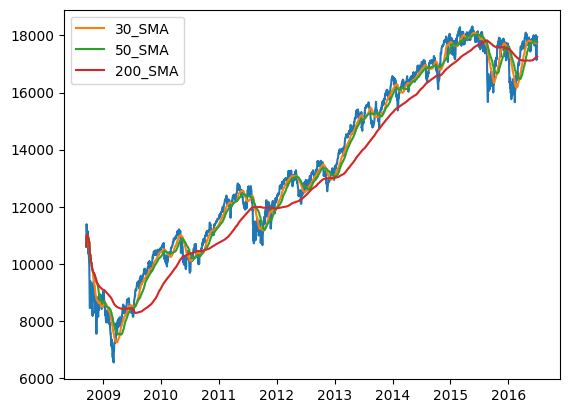

In [7]:
#have a bit issue with the x-axis
plt.plot(df_master['Date'].values, df_master['Adj Close**'].values)
plt.plot(df_master['Date'].values, df_master['30_SMA'].values, label = "30_SMA")
plt.plot(df_master['Date'].values, df_master['50_SMA'].values, label = "50_SMA")
plt.plot(df_master['Date'].values, df_master['200_SMA'].values, label = "200_SMA")

plt.legend()
plt.show()




In [ ]:
#Exponential moving average (EMA)

EMAToday=( ValueToday*(Constant/ (1+No. Of Days)) )+( EMAYesterday*(1-(Constant/(1+No. Of Days))) )

In [8]:
n = 200
df_master['EMA'] = df_master['Adj Close**'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()

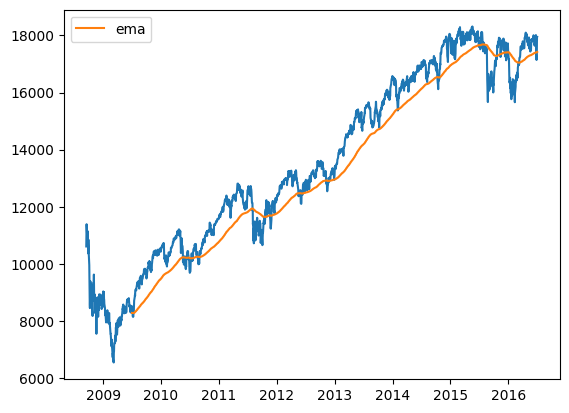

In [9]:
plt.plot(df_master['Date'].values, df_master['Adj Close**'].values)
plt.plot(df_master['Date'].values, df_master['EMA'].values, label = "ema")
plt.legend()
plt.show()



In [ ]:
#Bollinger Bands

In [10]:
n = 50
MA = pd.Series(df_master['Adj Close**'].rolling(n).mean())
STD = pd.Series(df_master['Adj Close**'].rolling(n).std())
bb1 = MA + 2*STD
df_master['Upper Bollinger Band'] = pd.Series(bb1)
bb2 = MA - 2*STD
df_master['Lower Bollinger Band'] = pd.Series(bb2)


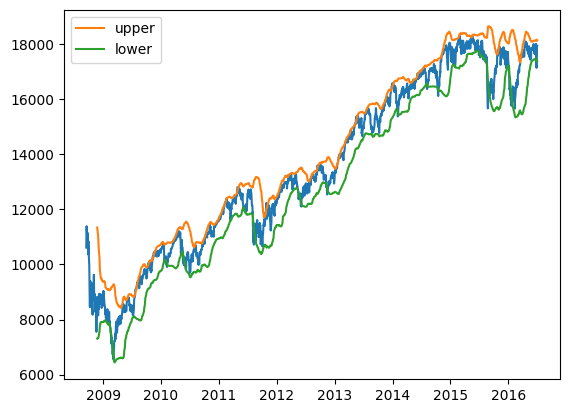

In [21]:
plt.plot(df_master['Date'].values, df_master['Adj Close**'].values)
plt.plot(df_master['Date'].values, df_master['Upper Bollinger Band'].values, label = "upper")
plt.plot(df_master['Date'].values, df_master['Lower Bollinger Band'].values, label = "lower")

plt.legend()
plt.show()


In [ ]:
#Stochastic oscillator

In [12]:
n = 200
smin = df_master['Low'].rolling(n).min()
smax = df_master['High'].rolling(n).max()
df_master['stoch_k'] = 100 * (df_master['Adj Close**'] - smin) / (smax - smin)
d_n = 50
df_master['stoch_d'] = df_master['stoch_k'].rolling(d_n).mean()


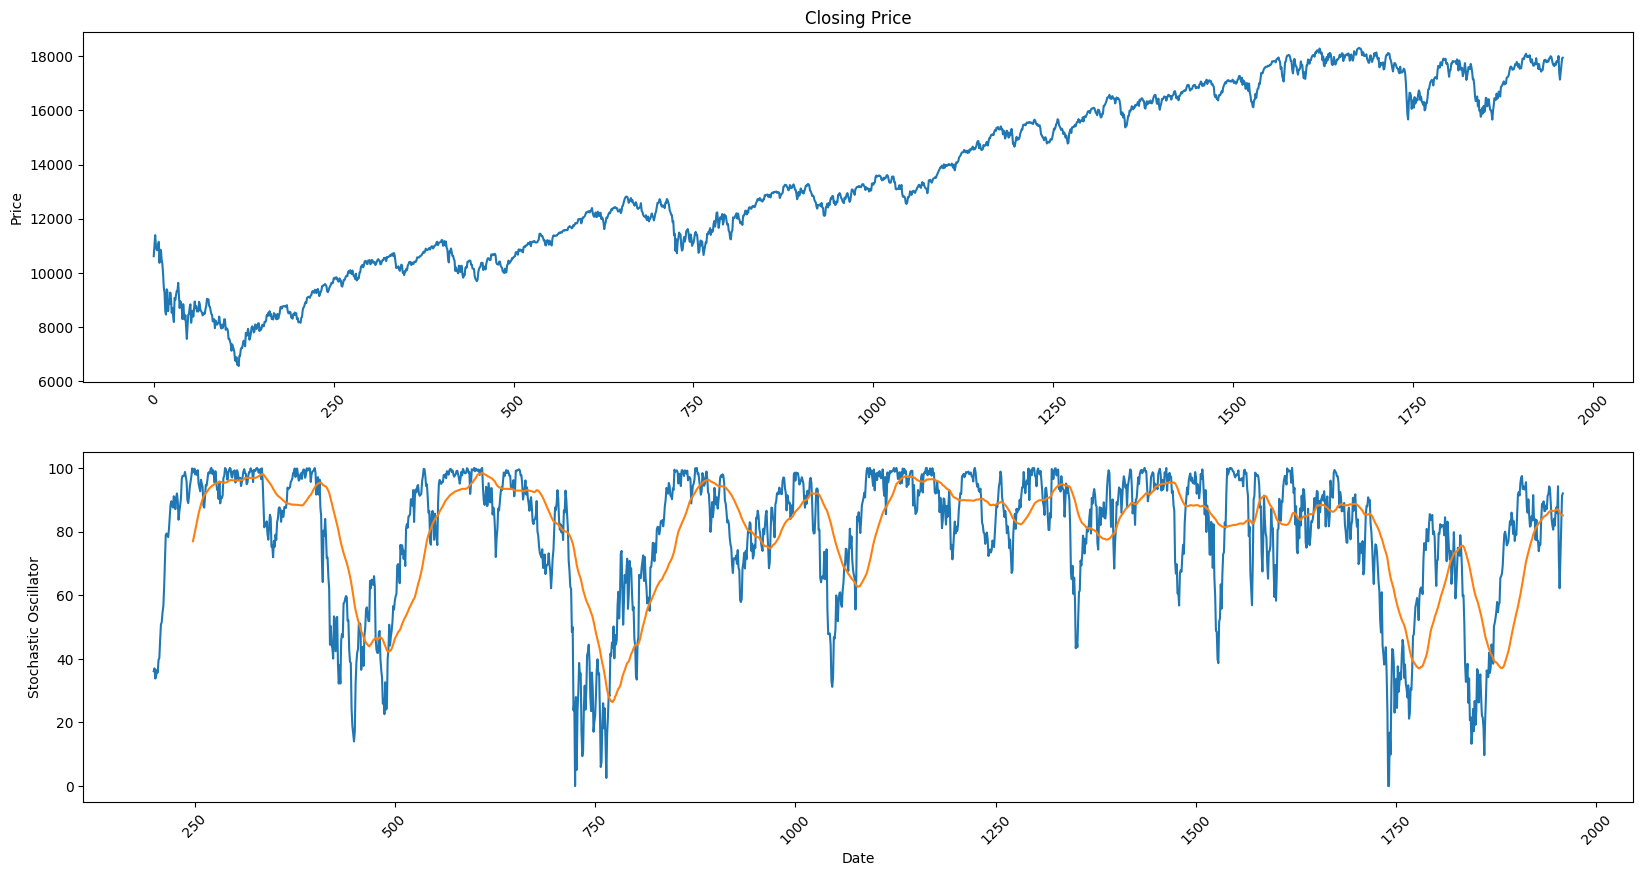

In [13]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Adj Close**'])
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_master['stoch_k'], label='Stoch %K')
ax2.plot(df_master['stoch_d'], label='Stoch %D')
ax2.set_ylabel('Stochastic Oscillator')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)


In [ ]:
#RSI

In [14]:
n = 50 # Number of period
change = df_master['Adj Close**'].diff(1)
df_master['Gain'] = change.mask(change<0,0)
df_master['Loss'] = abs(change.mask(change>0,0))
df_master['AVG_Gain'] = df_master.Gain.rolling(n).mean()
df_master['AVG_Loss'] = df_master.Loss.rolling(n).mean()
df_master['RS'] = df_master['AVG_Gain']/df_master['AVG_Loss']
df_master['RSI'] = 100 - (100/(1+df_master['RS']))


Text(0.5, 0, 'Date')

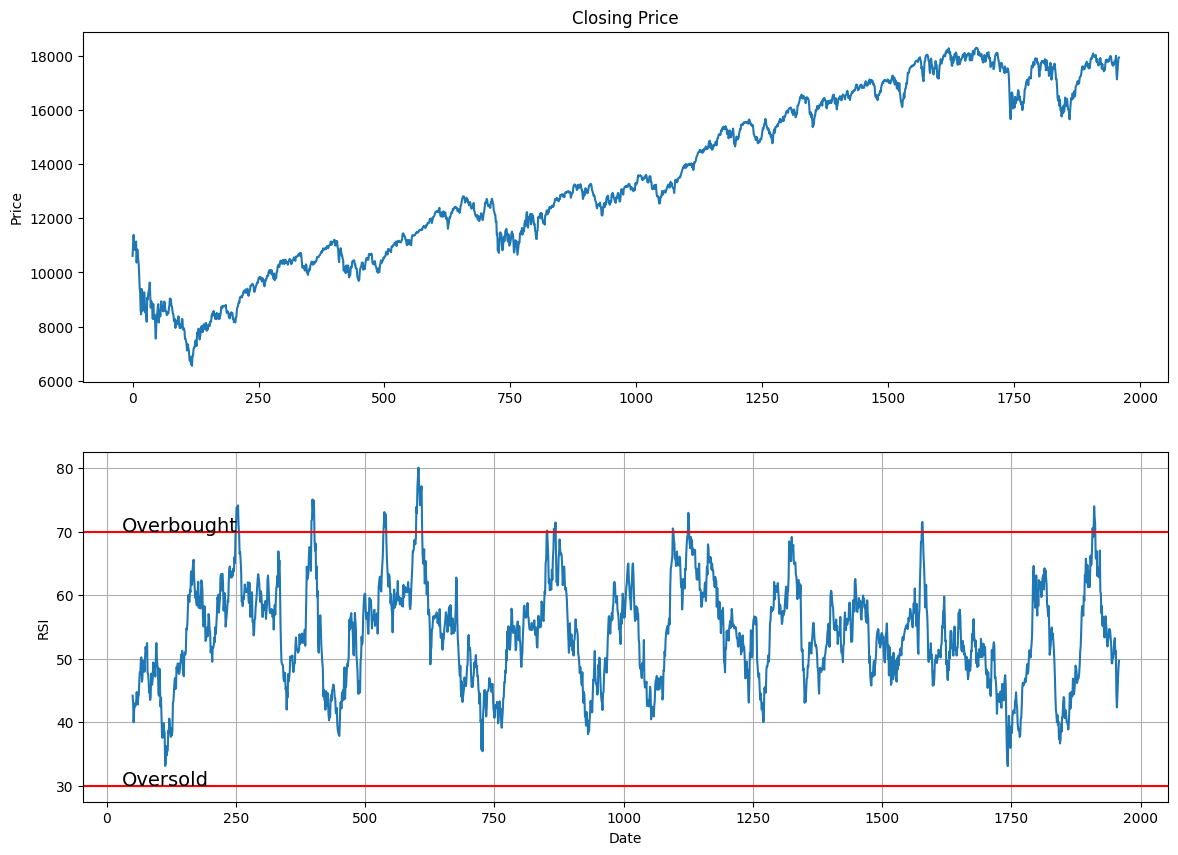

In [15]:
#df_master axis is not there
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Adj Close**'])
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_master['RSI'], label='Relative Strengths Index')
ax2.text(s='Overbought', x=df_master.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df_master.RSI.index[30], y=30, fontsize=14)
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')


In [16]:
#on balance volumne
import numpy as np
df_master['obv'] = (np.sign(df_master['Adj Close**'].diff()) * df_master['Volume']).fillna(0).cumsum()


Text(0.5, 0, 'Date')

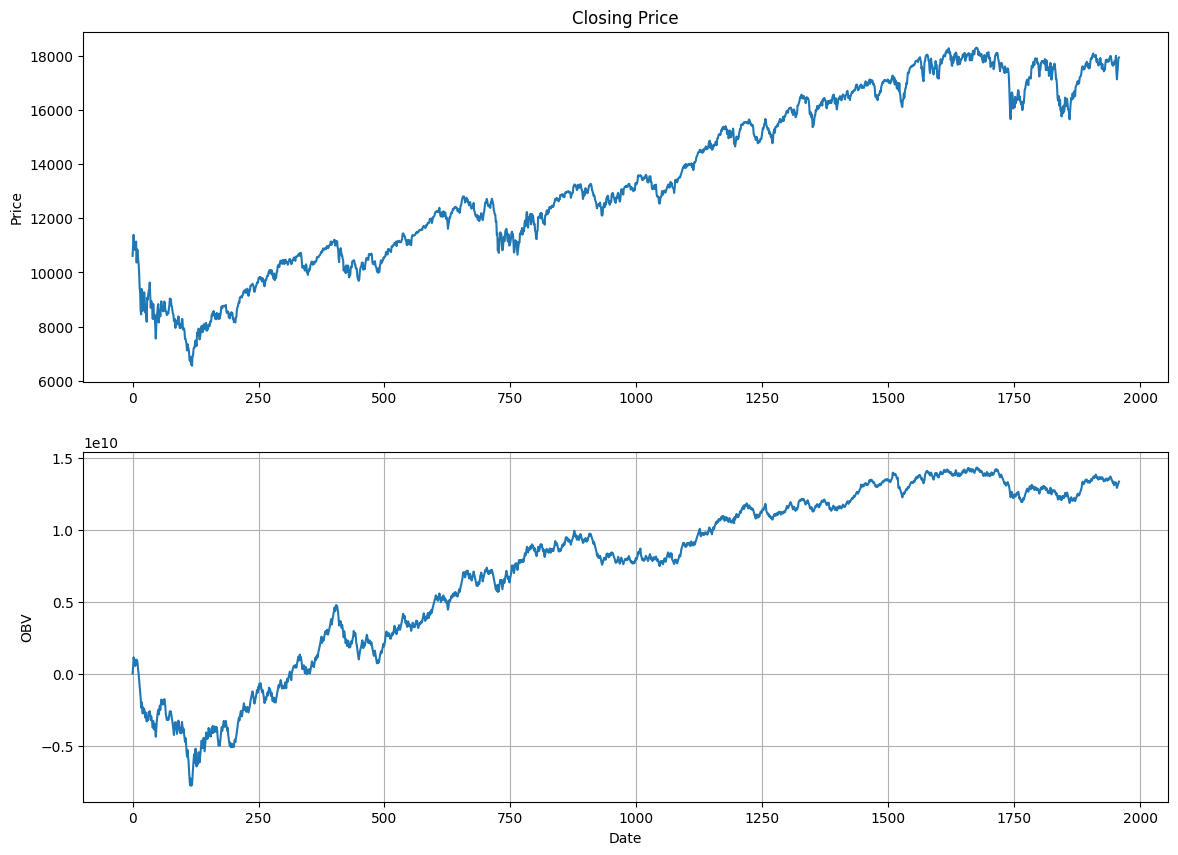

In [118]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Adj Close**'])
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_master['obv'], label='On Balance Volume')
ax2.grid()
ax2.set_ylabel('OBV')
ax2.set_xlabel('Date')


In [17]:
#Volume Accumulation Oscillator (VAO)
df_master['VAO'] = df_master['Volume'] * (df_master['Adj Close**'] - (df_master['High']+df_master['Low'])/2)
df_master.head()


,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,stoch_k,stoch_d,Gain,Loss,AVG_Gain,AVG_Loss,RS,RSI,obv,VAO
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-1.004889e+11
1,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,NaN,NaN,410.03,0.00,NaN,NaN,NaN,NaN,4.880600e+08,1.228691e+11
2,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,NaN,NaN,368.75,0.00,NaN,NaN,NaN,NaN,1.143170e+09,8.749977e+10
3,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,NaN,NaN,0.00,372.75,NaN,NaN,NaN,NaN,9.299600e+08,-3.788742e+10
4,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,NaN,NaN,0.00,161.52,NaN,NaN,NaN,NaN,7.254800e+08,-2.748313e+10


In [18]:
df_master['Positive'] = df_master['VAO'] > 0
df_master['VolumePositive'] = df_master['Open'] < df_master['Adj Close**']


Text(0.5, 0, 'Date')

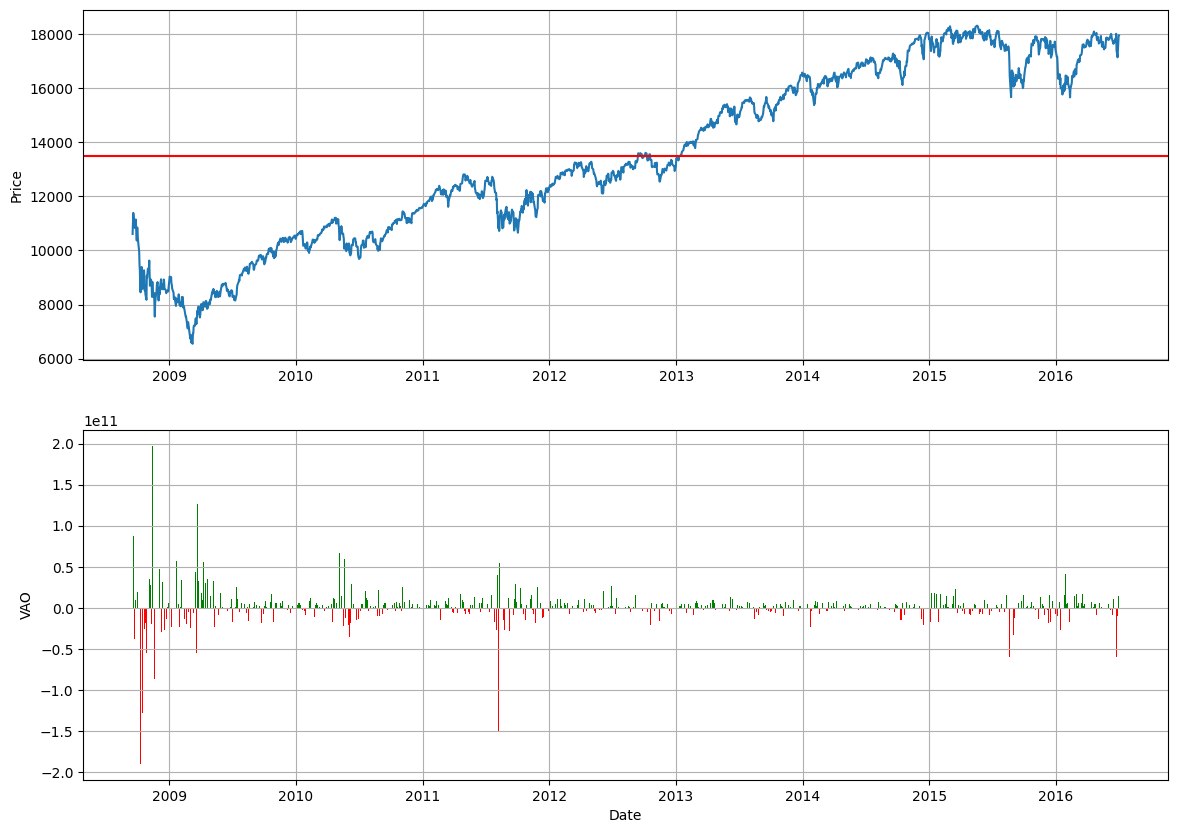

In [19]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Date'].values, df_master['Adj Close**'].values)
ax1.axhline(y=df_master['Adj Close**'].mean(),color='r')
ax1.grid()
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df_master['Date'].values, df_master['VAO'].values, color=df_master.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('VAO')
ax2.set_xlabel('Date')


In [20]:
df_master.to_csv("df_master.csv")

## Tree model stacking

In [3]:
#https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349
#very good reference

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_prediction=pd.DataFrame(columns=['Date'])

In [6]:
df_master=pd.read_csv("df_master.csv", index_col=0)

In [7]:
df_master.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Gain,Loss,AVG_Gain,AVG_Loss,RS,RSI,obv,VAO,Positive,VolumePositive
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-1.004889e+11,False,False
1,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,410.03,0.00,NaN,NaN,NaN,NaN,4.880600e+08,1.228691e+11,True,True
2,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,368.75,0.00,NaN,NaN,NaN,NaN,1.143170e+09,8.749977e+10,True,True
3,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,0.00,372.75,NaN,NaN,NaN,NaN,9.299600e+08,-3.788742e+10,False,False
4,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,0.00,161.52,NaN,NaN,NaN,NaN,7.254800e+08,-2.748313e+10,False,False


In [8]:
df_master.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume',
       'percentage', 'z-score', 'Label', 'significance', 'sentiment', '30_SMA',
       '50_SMA', '200_SMA', 'EMA', 'Upper Bollinger Band',
       'Lower Bollinger Band', 'stoch_k', 'stoch_d', 'Gain', 'Loss',
       'AVG_Gain', 'AVG_Loss', 'RS', 'RSI', 'obv', 'VAO', 'Positive',
       'VolumePositive'],
      dtype='object')

In [9]:
#30_SMA, #50_SMA, #200_SMA, #EMA, #Upper Bollinger Band, #Lower Bollinger Band, #stoch_k, #stoch_d, #RSI, #obv,#VAO
#significance #sentiment => #percentage as the y-axis

In [10]:
df_master.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume',
       'percentage', 'z-score', 'Label', 'significance', 'sentiment', '30_SMA',
       '50_SMA', '200_SMA', 'EMA', 'Upper Bollinger Band',
       'Lower Bollinger Band', 'stoch_k', 'stoch_d', 'Gain', 'Loss',
       'AVG_Gain', 'AVG_Loss', 'RS', 'RSI', 'obv', 'VAO', 'Positive',
       'VolumePositive'],
      dtype='object')

In [11]:
df_master.head()
df_master['percentage_yesterday']=df_master['percentage']

In [12]:
# lets first shifting
mask = ~(df_master.columns.isin(['Date','Open', 'High', 'Low', 'Close*', 'Adj Close**', 'percentage']))

cols_to_shift = df_master.columns[mask]

df_master[cols_to_shift] = df_master.loc[:,mask].shift(1)


In [13]:
df_master.head() #look at the positive columsn, we are using yesterday's information

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Loss,AVG_Gain,AVG_Loss,RS,RSI,obv,VAO,Positive,VolumePositive,percentage_yesterday
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,NaN,-0.040633,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,463200000.0,0.038647,-3.403907,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-1.004889e+11,False,False,-0.040633
2,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,488060000.0,0.033463,-1.564634,1.0,...,0.00,NaN,NaN,NaN,NaN,4.880600e+08,1.228691e+11,True,True,0.038647
3,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,655110000.0,-0.032731,0.011810,1.0,...,0.00,NaN,NaN,NaN,NaN,1.143170e+09,8.749977e+10,True,True,0.033463
4,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,213210000.0,-0.014663,-1.549244,0.0,...,372.75,NaN,NaN,NaN,NaN,9.299600e+08,-3.788742e+10,False,False,-0.032731


# XGBoost Regression

In [14]:
import xgboost as xgb

In [15]:
model=xgb.XGBRegressor()

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X=df_master[['significance', 'sentiment', '30_SMA', '50_SMA', '200_SMA', 'EMA', 'Upper Bollinger Band', 'Lower Bollinger Band', 'stoch_k', 'stoch_d', 'RSI', 'obv', 'VAO', 'percentage_yesterday']]

In [18]:
y=df_master[['percentage', 'Date']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99, shuffle=False)

In [20]:
y_train

,percentage,Date
0,-0.040633,2008-09-17
1,0.038647,2008-09-18
2,0.033463,2008-09-19
3,-0.032731,2008-09-22
4,-0.014663,2008-09-23
...,...,...
1366,0.001159,2014-02-26
1367,0.004583,2014-02-27
1368,0.003015,2014-02-28
1369,-0.009416,2014-03-03


In [21]:
y_test

,percentage,Date
1371,-0.002177,2014-03-05
1372,0.003772,2014-03-06
1373,0.001877,2014-03-07
1374,-0.002069,2014-03-10
1375,-0.004107,2014-03-11
...,...,...
1954,-0.014971,2016-06-27
1955,0.015722,2016-06-28
1956,0.016368,2016-06-29
1957,0.013298,2016-06-30


In [19]:
df_prediction['Date']=y_test['Date']

In [20]:
y_test=y_test.drop(columns='Date')
y_train=y_train.drop(columns='Date')

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 0 to 1370
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   significance          1370 non-null   float64
 1   sentiment             1370 non-null   float64
 2   30_SMA                1370 non-null   float64
 3   50_SMA                1370 non-null   float64
 4   200_SMA               1370 non-null   float64
 5   EMA                   1171 non-null   float64
 6   Upper Bollinger Band  1321 non-null   float64
 7   Lower Bollinger Band  1321 non-null   float64
 8   stoch_k               1171 non-null   float64
 9   stoch_d               1122 non-null   float64
 10  RSI                   1320 non-null   float64
 11  obv                   1370 non-null   float64
 12  VAO                   1370 non-null   float64
 13  percentage_yesterday  1370 non-null   float64
dtypes: float64(14)
memory usage: 160.7 KB


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 1371 to 1958
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   significance          588 non-null    float64
 1   sentiment             588 non-null    float64
 2   30_SMA                588 non-null    float64
 3   50_SMA                588 non-null    float64
 4   200_SMA               588 non-null    float64
 5   EMA                   588 non-null    float64
 6   Upper Bollinger Band  588 non-null    float64
 7   Lower Bollinger Band  588 non-null    float64
 8   stoch_k               588 non-null    float64
 9   stoch_d               588 non-null    float64
 10  RSI                   588 non-null    float64
 11  obv                   588 non-null    float64
 12  VAO                   588 non-null    float64
 13  percentage_yesterday  588 non-null    float64
dtypes: float64(14)
memory usage: 68.9 KB


In [23]:
train_matrix=xgb.DMatrix(data=X_train, label=y_train)
test_matrix=xgb.DMatrix(data=X_test, label=y_test)

In [24]:
reg_params =  [1, 10, 100]


In [25]:
params = {"objective": "reg:squarederror"}


In [26]:
# Create an empty list for storing rmses as a function of ridge regression complexity
ridge_regression = []


In [27]:
# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg

    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=train_matrix, params=params, nfold=5, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

    # Append best rmse (final round)
    ridge_regression.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])



In [28]:
ridge_regression

[0.08529344483822347, 0.08673600648241078, 0.10108734696928612]

In [29]:
print("Best RMSE as a function of ridge regression (L2 regularization):")
print(pd.DataFrame(list(zip(reg_params, ridge_regression)), columns=["l2", "rmse"]))


Best RMSE as a function of ridge regression (L2 regularization):
    l2      rmse
0    1  0.085293
1   10  0.086736
2  100  0.101087


In [30]:
# gets pick the best model
params = {"objective": "reg:squarederror", 
         "lambda": "1"}

bst = xgb.train(dtrain=train_matrix, params=params, num_boost_round=50)




In [31]:
prediction=bst.predict(test_matrix)

In [32]:
df_prediction['iterate_prediction']=prediction
df_prediction.head()

,Date,iterate_prediction
1371,2014-03-05,-0.000488
1372,2014-03-06,0.004805
1373,2014-03-07,0.001993
1374,2014-03-10,0.003717
1375,2014-03-11,-0.001528


In [33]:
from sklearn.metrics import mean_squared_error
print((mean_squared_error(prediction, y_test, squared=False)))


0.012073810754287054


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

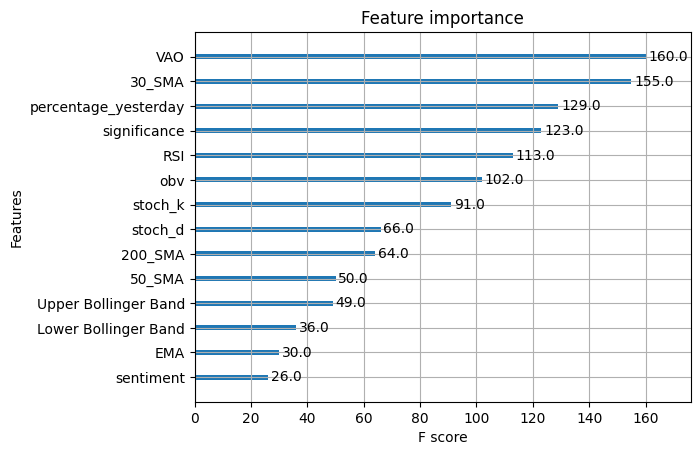

In [34]:
xgb.plot_importance(bst)


## Grid Search ##

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [62]:
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [4, 5, 6]
}


In [63]:
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")


In [64]:
grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params, scoring='neg_mean_squared_error',
                    cv=4, verbose=1)


In [65]:
grid.fit(X_train, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [4, 5, 6], 'n_estimators': [100],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
grid


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [4, 5, 6], 'n_estimators': [100],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))



Best parameters found:  {'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}
Lowest RMSE found:  0.01702111335907072


In [68]:
# gets pick the best model, no need for nestimators
params = {"objective": "reg:squarederror", 
         'colsample_bytree': 0.3, 
          'learning_rate': 0.2, 
          'max_depth': 4, 
          'subsample': 0.2
         }

bst_grid = xgb.train(dtrain=train_matrix, params=params, num_boost_round=50)


In [69]:
grid_prediction=bst_grid.predict(test_matrix)

In [70]:
grid_prediction[0:5]

array([0.0006137 , 0.00238667, 0.00238667, 0.00171697, 0.00101665],
      dtype=float32)

In [71]:
df_prediction['grid_prediction']=grid_prediction

In [72]:
print((mean_squared_error(grid_prediction, y_test, squared=False)))


0.009227989218652885


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

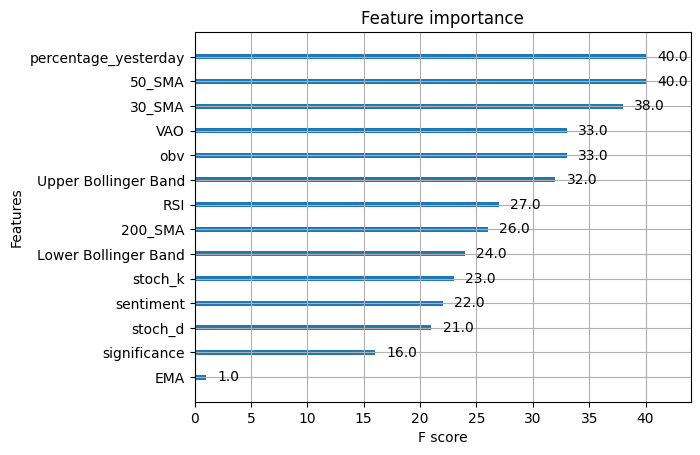

In [74]:
xgb.plot_importance(bst_grid)


## Random Search Parameters


In [75]:
params_random_search = {
    'learning_rate': np.arange(0.01, 1.01, 0.01),
    'n_estimators': [50, 100, 200],
    'max_depth': range(2, 12),
    'subsample': np.arange(0.02, 1.02, 0.02),
    'colsample_bytree': [0.3, 0.5, 0.7,1],

}


In [76]:
xg_random_reg = xgb.XGBRegressor(objective= "reg:squarederror")


In [77]:
randomized_mse = RandomizedSearchCV(param_distributions=params_random_search, estimator=xg_random_reg,
                                    scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)


In [78]:
randomized_mse.fit(X_train, y_train)


Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': range(2, 12),
                                        'n_estimators': [50, 100, 200],
                                        'subsample': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])},
                   scoring='neg_mean_squared_error', verbose=1)

In [79]:
print("Randomize Search Cross Validation")
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))


Randomize Search Cross Validation
Best parameters found:  {'subsample': 0.04, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.13, 'colsample_bytree': 0.3}
Lowest RMSE found:  0.017303117188006527


In [80]:
# gets pick the best model, no need for nestimators
params = {"objective": "reg:squarederror", 
         'subsample': 0.30000000000000004,  'max_depth': 6, 'learning_rate': 0.17, 'colsample_bytree': 0.7
         }

bst_random = xgb.train(dtrain=train_matrix, params=params, num_boost_round=50)

In [81]:
random_prediction=bst_random.predict(test_matrix)

In [82]:
df_prediction['random_prediction']=random_prediction

In [83]:
print((mean_squared_error(random_prediction, y_test, squared=False)))


0.009351405571925205


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

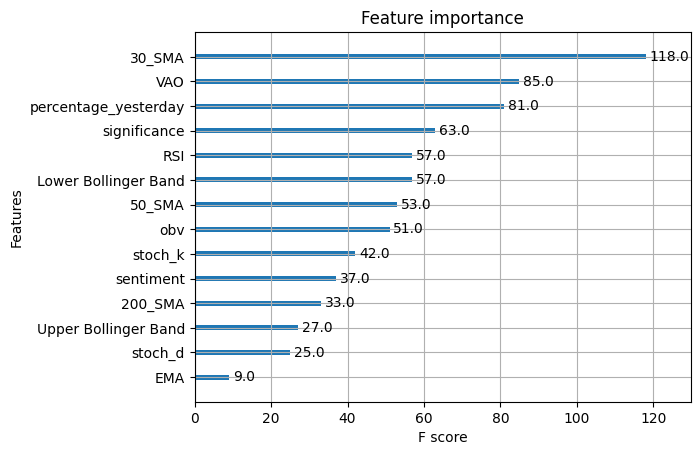

In [84]:
xgb.plot_importance(bst_random)

In [85]:
df_prediction.to_csv("prediction_output.csv")